# IEOR 4732
# Simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.stats import norm

## 1. Inverse transform method

In [2]:
x = np.arange(-10, 10 + 0.01, 0.01)

# standard normal
y1 = norm.pdf(x, 0, 1)
y2 = norm.cdf(x, 0, 1)

# mixture of normals
y1h = (norm.pdf(x, 0, 1) + norm.pdf(x, -2, 2) + norm.pdf(x, 2, 0.75))/3
y2h = (norm.cdf(x, 0, 1) + norm.cdf(x, -2, 2) + norm.cdf(x, 2, 0.75))/3

u1 = 0.82 #rand
# inverse transform
i1 = np.where(y2 <= u1)[0]
x1 = np.round(x[i1[-1]],2)
i2 = np.where(y2h <= u1)[0]
x2 = np.round(x[i2[-1]],2)

xX1 = np.arange(0, x1 + 0.01, 0.01)
xX2 = np.arange(0, x2 + 0.01, 0.01)

uU1 = np.arange(0, u1 + 0.01, 0.01)

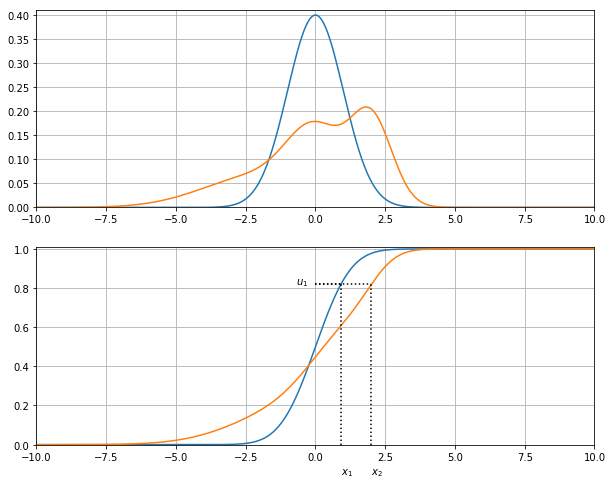

In [3]:
plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.plot(x, y1)
plt.plot(x, y1h)
plt.grid(True)
plt.xlim([-10,10])
plt.ylim([0,.41])

plt.subplot(2,1,2)
plt.plot(x, y2)
plt.plot(x, y2h)
plt.plot(xX1, u1 * np.ones(len(xX1)), 'k:')
plt.plot(xX2, u1 * np.ones(len(xX2)), 'k:')
plt.plot(x1 * np.ones(len(uU1)), uU1, 'k:')
plt.plot(x2 * np.ones(len(uU1)), uU1, 'k:')
plt.text(x1, -0.15, '$x_1$')
plt.text(x2, -0.15, '$x_2$')
plt.text(-0.7, u1, '$u_1$')
plt.grid(True)
plt.xlim([-10,10])
plt.ylim([0,1.01])

plt.show()

## 2. Inverting Standard Normal Distribution via Rational Approximation

In [4]:
def inverting_std_normal_dist(p):
    ''' Given p, find z such that P(Z <= z) = p
    via rational approximation '''
    
    a1 = -39.69683028665376
    a2 = 220.9460984245205
    a3 = -275.9285104469687   
    a4 = 138.3577518672690
    a5 = -30.66479806614716
    a6 = 2.506628277459239

    b1 = -54.47609879822406
    b2 = 161.5858368580409
    b3 = -155.6989798598866
    b4 = 66.80131188771972
    b5 = -13.28068155288572

    c1 = -0.007784894002430293
    c2 = -0.3223964580411365
    c3 = -2.400758277161838
    c4 = -2.549732539343734
    c5 = 4.374664141464968
    c6 = 2.938163982698783

    d1 = 0.007784695709041462
    d2 = 0.3224671290700398
    d3 = 2.445134137142996
    d4 = 3.754408661907416
    
    # define break-points
    p_low =  0.02425
    p_high = 1 - p_low
    
    # rational approximation for the lower region
    if 0 < p and p < p_low:
        q = np.sqrt(-2*np.log(p))
        z = (((((c1*q+c2)*q+c3)*q+c4)*q+c5)*q+c6) / ((((d1*q+d2)*q+d3)*q+d4)*q+1)
    # rational approximation for the central region
    elif p_low <= p and p <= p_high:
        q = p - 0.5
        r = q*q
        z = (((((a1*r+a2)*r+a3)*r+a4)*r+a5)*r+a6)*q / (((((b1*r+b2)*r+b3)*r+b4)*r+b5)*r+1)
    # rational approximation for the upper region
    elif p_high < p and p < 1:
        q = np.sqrt(-2*np.log(1-p))
        z = -(((((c1*q+c2)*q+c3)*q+c4)*q+c5)*q+c6) / ((((d1*q+d2)*q+d3)*q+d4)*q+1)

    return z

In [5]:
# test the function
uU = np.array([0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
for u in uU:
    print(inverting_std_normal_dist(u))

-2.326347874388028
-1.6448536251336814
-1.2815515641401563
-0.6744897502234225
0.0
0.6744897502234225
1.2815515641401563
1.644853625133699
2.326347874388028


In [6]:
# compare with scipy function norm.ppf
for u in uU:
    print(norm.ppf(u))

-2.3263478740408408
-1.6448536269514729
-1.2815515655446004
-0.6744897501960817
0.0
0.6744897501960817
1.2815515655446004
1.6448536269514722
2.3263478740408408


## 3. Sampling from standard normal distribution

In [7]:
nN = 1000000
z1 = np.zeros(nN)
z2 = np.zeros(nN)
z3 = np.zeros(nN)
z4 = np.zeros(nN)

### 3.1 Box-Muller

In [8]:
# vector form (fast)
startTime = time.time()
u1 = np.random.rand(nN // 2)
u2 = np.random.rand(nN // 2)
z1[: nN//2] = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
z1[nN//2 :] = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
endTime = time.time()
print('Box-Muller is done. Time elapased was (seconds): %g' % (endTime - startTime))

Box-Muller is done. Time elapased was (seconds): 0.0579419


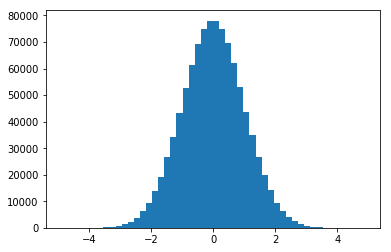

In [9]:
plt.hist(z1, bins=50)
plt.show()

### 3.2 Marsaglia Polar

In [10]:
startTime = time.time()
for i in range(nN // 2):
    while True:
        v1 = 2 * np.random.rand() - 1
        v2 = 2 * np.random.rand() - 1
        r = v1 ** 2 + v2 ** 2
        if r <= 1.0:
            break
    r = np.sqrt(-2 * np.log(r) / r)
    z2[i] = v1 * r
    z2[i + nN//2] = v2 * r
endTime = time.time()
print('Marsaglia Polar is done. Time elapased was (seconds): %g' % (endTime - startTime))

Marsaglia Polar is done. Time elapased was (seconds): 2.5515


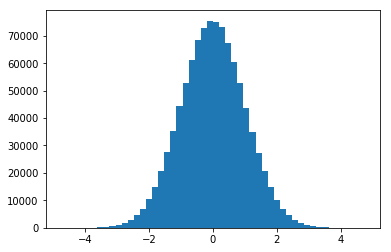

In [11]:
plt.hist(z2, bins=50)
plt.show()

### 3.3 Rational approximation

In [12]:
startTime = time.time()
for i in range(nN):
    z3[i] = inverting_std_normal_dist(np.random.rand())
endTime = time.time()
print('Rational approximation is done. Time elapased was (seconds): %g' % (endTime - startTime))

Rational approximation is done. Time elapased was (seconds): 1.8052


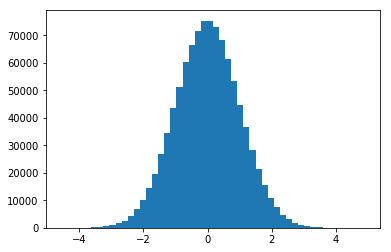

In [13]:
plt.hist(z3, bins=50)
plt.show()

### 3.4 Acceptance-Rejection (not efficient)

In [14]:
startTime = time.time()
for i in range(nN):
    while True:
        u1, u2 = np.random.rand(2)
        x = -np.log(u1)
        if u2 <= np.exp(-0.5 * (x - 1) ** 2):
            break
    if np.random.rand() <= 0.5:
        x = -x
    z4[i] = x
endTime = time.time()
print('Acceptance-Rejection is done. Time elapased was (seconds): %g' % (endTime - startTime))

Acceptance-Rejection is done. Time elapased was (seconds): 8.60173


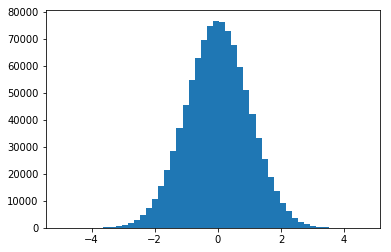

In [15]:
plt.hist(z4, bins=50)
plt.show()

## 4. Gamma

Gamma($\alpha$, $\beta$) generator using Marsaglia and Tsang method (Algorithm 4.33).

$\beta$ is the scale parameter, meaning $E(X) = \alpha \beta$ and $V(X) = \alpha \beta^2$.

In [16]:
def samplingFromGammaProcess(alpha, beta):
    '''alpha: shape parameter
    beta: scale parameter'''
    # case 1: alpha >= 1
    if alpha >= 1:
        # step 1: set c & d
        d = alpha - 1.0 / 3.0
        c = 1.0 / np.sqrt(9.0 * d)
        while True:
            # step 2: generate randZ & randU independently
            uTemp, randU = np.random.rand(2)
            randZ = inverting_std_normal_dist(uTemp) 
            # step 3: if randZ & randU satisfy certain conditions return randG
            if randZ > (-1.0 / c):
                tmp1 = (1.0 + c * randZ) ** 3
                if np.log(randU) < (0.5 * randZ ** 2 + d - d * tmp1 + d * np.log(tmp1)):
                    break
        randG = d * tmp1 * beta
    # case 2: 0 < alpha < 1:
    else:
        tmp1 = samplingFromGammaProcess(alpha + 1, beta)
        randU = np.random.rand()
        randG = tmp1 * randU ** (1. / alpha)
    
    return randG

In [17]:
nN = 1000000
g = np.zeros(nN)

alpha = 2.
beta = 3.

In [18]:
startTime = time.time()
for i in range(nN):
    g[i] = samplingFromGammaProcess(alpha, beta)
endTime = time.time()
print('Gamma simulation is done. Time elapased was (seconds): %g' % (endTime - startTime))

Gamma simulation is done. Time elapased was (seconds): 11.7594


In [19]:
print(np.mean(g))
print(np.var(g))

5.999865474642817
18.079668980014617


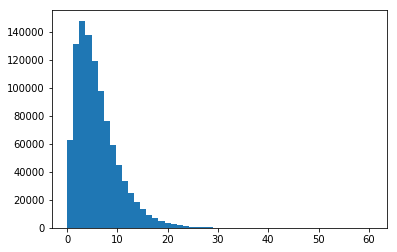

In [20]:
plt.hist(g, bins=50)
plt.show()

## 5. Random number generator

We can use the numpy generator: np.random.rand() or we can implement our own.

ran2_mod.cpp - This module is taken from NUMERICAL RECIPES IN C by Press,
            Teukolsky, Vetterling, and Flannery (PTVF); 1992; page 282.

       Long period (> 2 * 10^18) random number generator of L'Ecuyer with Bays-Durham
       shuffle and added safeguards. Returns a uniform random deviate between 0.0 and
       1.0 (exclusive of the endpoint values). Call with idum a negative integer to
       initialize; thereafter, do not alter idum between successive deviates in a
       sequence. RNMX should approximate the largest floating value that is less than 1.

In [ ]:
IM1 = 2147483563
IM2 = 2147483399
AM = (1.0/IM1)
IMM1 = (IM1-1)
IA1 = 40014
IA2 = 40692
IQ1 = 53668
IQ2 = 52774
IR1 = 12211
IR2 = 3791
NTAB = 32
NDIV = (1+IMM1//NTAB)
EPS = 1.2e-7
RNMX = (1.0-EPS)

idum2 = 123456789
iy = 0
iv = np.zeros(NTAB, dtype=int)

In [ ]:
def ran2_mod():
    # it is not good practice to use global variables
    global idum
    global idum2
    global iy
    global iv

    local_idum = idum
    #print('local_idum = ' + str(local_idum))

    if (local_idum <= 0):
        if (-(local_idum) < 1): 
            local_idum=1
        else: 
            local_idum = -(local_idum)

        idum2=(local_idum)
        
        for j in np.arange(NTAB+7, -1, -1):
            k=(local_idum)//IQ1
            local_idum = IA1*(local_idum-k*IQ1)-k*IR1
            if (local_idum < 0): 
                local_idum += IM1
      
            if (j < NTAB): 
                iv[j] = local_idum
    
        iy=iv[0]
  
    k = (local_idum)//IQ1
    local_idum = IA1*(local_idum-k*IQ1)-k*IR1
    if (local_idum < 0):
        local_idum += IM1
  
    k = idum2//IQ2
    idum2=IA2*(idum2-k*IQ2)-k*IR2
    if (idum2 < 0):
        idum2 += IM2
  
    #print('iy=' + str(iy))
    j = iy // NDIV
    #print('j=' + str(j))
    iy = iv[j] - idum2
    iv[j] = local_idum
    if (iy < 1): 
        iy += IMM1

    idum = local_idum;
    
    #print('iy='+str(iy))
    temp = AM * iy
    if (temp > RNMX): 
        return RNMX
    else: 
        return temp

In [ ]:
# set seed
idum = -26876761

In [ ]:
nN = 1000000
u = np.zeros(nN)

In [ ]:
startTime = time.time()
for i in range(nN):
    u[i] = ran2_mod()
endTime = time.time()
print('ran2_mod is done. Time elapased was (seconds): %g' % (endTime - startTime))

In [ ]:
plt.hist(u, bins=100)
plt.show()

In [ ]:
# numpy is much faster (vector form)
%timeit np.random.rand(nN)

## 6. Visualization of Acceptance-Rejection

In [ ]:
xX = np.arange(0, 5, 0.01)
f1 = np.exp(- xX ** 2 / 2) / np.sqrt(2 * np.pi)
f = np.sqrt(2 / np.pi) * np.exp(- xX ** 2 / 2)

g2 = np.exp(-xX)

factor = 3
c = factor * np.sqrt(2/np.pi) * np.exp(0.5)
g1 = c * g2

In [ ]:
nTrials = 10000000
xArray = np.zeros(nTrials)
fArray = np.zeros(nTrials)
cgArray = np.zeros(nTrials)
uArray = np.zeros(nTrials)

nSamples = 50000
count = 0
i = 0

indicators = np.zeros(nTrials, dtype = int)

while True:
    u = np.random.rand()
    x = np.random.exponential()
    
    fX = np.sqrt(2/np.pi)*np.exp(-x*x/2)
    gX = np.exp(-x)
    ratio = fX/(c*gX)
    
    if u <= ratio:
        # accept
        count += 1;
        indicators[i] = 1
        # which side?
        u2 = np.random.rand()
        if u2 > 0.5:
            x = -x
  
    xArray[i] = x
    fArray[i] = fX
    cgArray[i] = c * gX
    uArray[i] = u
    
    i += 1

    if count >= nSamples:
        break
total_tries = i

indicators = indicators[:i]
xArray = xArray[:i]

In [ ]:
num_acc_points = 5

plt.figure(figsize=[10,6])
plt.plot(xX, f)
plt.plot(xX, g1)
plt.plot(xX, g2, 'C4')
j = 0
num_accept = 0
while True:
    plt.plot(np.abs(xArray[j]) * np.ones(2), [0, fArray[j]], 'C2')
    plt.plot(np.abs(xArray[j]) * np.ones(2), [fArray[j], cgArray[j]], 'C3' )
    if indicators[j]:
        plt.plot(np.abs(xArray[j]), uArray[j]*cgArray[j], 'C2o')
        num_accept += 1
    else:
        plt.plot(np.abs(xArray[j]), uArray[j]*cgArray[j], 'C3o')
    j += 1
    if num_accept >= num_acc_points:
        break
plt.legend(['$f(x)$','$cg(x)$','$g(x)$'])
plt.grid(True)
plt.xlabel('$x$')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

In [ ]:
z = np.arange(-5, 5, 0.01)
fz = norm.pdf(z)
plt.figure(figsize=[12,6])
plt.subplot(121)
plt.hist(xArray, bins=100, density=True)
plt.plot(z, fz, 'C3', linewidth=2)
plt.subplot(122)
plt.hist(xArray[indicators == True], bins = 100, density=True)
plt.plot(z, fz, 'C3', linewidth=2)
plt.plot()
plt.show()